<a href="https://colab.research.google.com/github/Farhansyah15/PraktikumML156-22/blob/main/Processing_%26_modeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import cv2
import numpy as np
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, Dropout, SpatialDropout2D, BatchNormalization, Input, Lambda, ZeroPadding2D
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.applications.resnet import ResNet50, preprocess_input 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/Machine Learning

/content/drive/MyDrive/Machine Learning


In [ ]:
!ls

best_model.h5  dataset2-master	xtest64.npy   xval64.npy   ytrain64.npy
data-master    split_data	xtrain64.npy  ytest64.npy  yval64.npy


In [ ]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# split dataset
data_dir = '/content/drive/MyDrive/Machine Learning/data-master'
output = '/content/drive/MyDrive/Machine Learning/split_data'
splitfolders.ratio(data_dir, output=output, seed=1337, ratio=(0.75, 0.24, 0.01))

Copying files: 12506 files [1:29:12,  2.34 files/s]


In [ ]:
import os

# create train, val, test paths
base_dir = '/content/drive/MyDrive/Machine Learning/split_data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
import cv2
import numpy as np

# gather train dataset
trainX = []
trainY = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            trainX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            trainY.append(label)

trainX = np.array(trainX)
trainY = np.array(trainY)

In [ ]:
# gather validation data
valX = []
valY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            valX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            valY.append(label)

valX = np.array(valX)
valY = np.array(valY)

In [ ]:
# gather test data
testX = []
testY = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            testX.append(image)
            label = imagePath.split(os.path.sep)[-2]
            testY.append(label)

testX = np.array(testX)
testY = np.array(testY)

In [ ]:
#Tampilkan shape
print("Train Data = ", trainX.shape)
print("Train Label = ", trainY.shape)
print("Validation Data = ", valX.shape)
print("Validation Label = ", valY.shape)

Train Data =  (9690, 150, 150, 3)
Train Label =  (9690,)
Validation Data =  (3625, 150, 150, 3)
Validation Label =  (3625,)


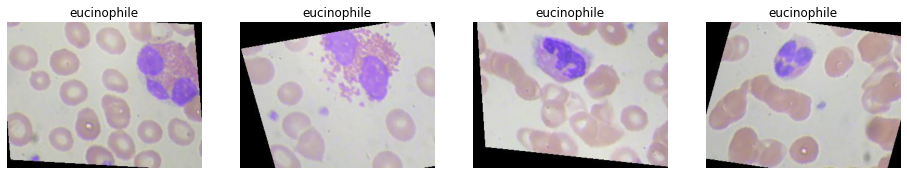

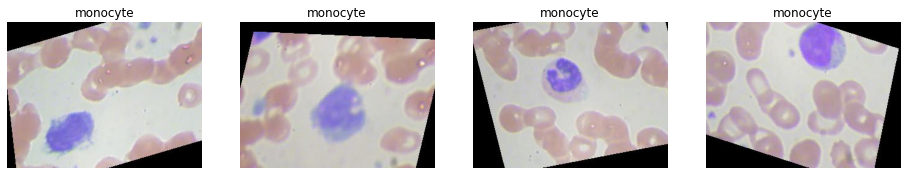

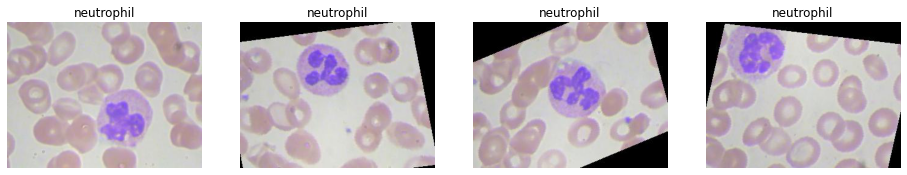

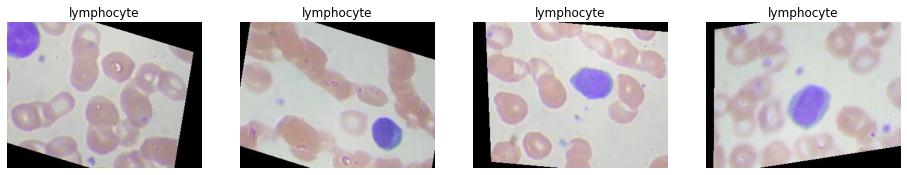

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_train_eosinophil=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/EOSINOPHIL")
file_train_monocyte=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/MONOCYTE")
file_train_neutrophil=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/NEUTROPHIL")
file_train_lymphocyte=os.path.join("/content/drive/MyDrive/Machine Learning/split_data/train/LYMPHOCYTE")

eosinophil_image = os.listdir(file_train_eosinophil)
monocyte_image = os.listdir(file_train_monocyte)
neutrophil_image = os.listdir(file_train_neutrophil)
lymphocyte_image = os.listdir(file_train_lymphocyte)

fname1 = [os.path.join(file_train_eosinophil,fname)
        for fname in eosinophil_image[:4]]

fname2 = [os.path.join(file_train_monocyte,fname)
        for fname in monocyte_image[:4]]

fname3 = [os.path.join(file_train_neutrophil,fname)
        for fname in neutrophil_image[:4]]

fname4 = [os.path.join(file_train_lymphocyte,fname)
        for fname in lymphocyte_image[:4]]

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('eucinophile')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('monocyte')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('neutrophil')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 4
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('lymphocyte')
    plt.imshow(img)
    
plt.show()

In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", trainY[:50])

lb = LabelEncoder()
y_train = lb.fit_transform(trainY)
y_val = lb.fit_transform(valY)

print("Label setelah di-encoder ", y_train[:50])

Label sebelum di-encoder  ['LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE'
 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE' 'LYMPHOCYTE']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#pengecekan nilai minimum dan maksimum pada datasets sebelum normalisasi
print('Train min=%.f, max=%.f' % (trainX.min(), trainX.max()))
print('Validation min=%.f, max=%.f' % (valX.min(), valX.max()))

Train min=0, max=255
Validation min=0, max=255


In [ ]:
#normalisasi menggunakan ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

train_norm = datagen.flow(trainX, y_train, batch_size=64)
val_norm = datagen.flow(valX, y_val, batch_size=64)

In [ ]:
#pengecekan nilai minimum dan maksimum pada datasets setelah normalisasi
batch_trainX, batch_trainy = train_norm.next()
batch_valX, batch_valy = val_norm.next()

print(f'Train min={batch_trainX.min()}, max={batch_trainX.max()}')
print(f'Validation min={batch_valX.min()}, max={batch_valX.max()}')

Train min=0.0, max=1.0
Validation min=0.0, max=0.9999120831489563


In [ ]:
img_shape = (150, 150)

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=img_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

validation_generator = datagen.flow_from_directory(validation_dir,
                                              target_size=img_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

test_generator = datagen.flow_from_directory(test_dir,
                                              target_size=img_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= True)

Found 9690 images belonging to 4 classes.
Found 3625 images belonging to 4 classes.
Found 2505 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import vgg16, vgg19
from tensorflow.keras.models import Model

In [ ]:
vgg19_model = vgg19.VGG19(include_top=False, input_tensor=Input(shape=(150,150,3)))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
class FCHeadNet:
  def build(baseModel, classes, D):
    headModel = vgg19_model.output
    headModel = Dropout(0.5)(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(D, activation='relu')(headModel)
    headModel = Dense(classes, activation='softmax')(headModel)
    return headModel

In [ ]:
headModel = FCHeadNet.build(vgg19_model, 4, 128)
model1 = Model(inputs=vgg19_model.input, outputs=headModel)

In [ ]:
for layer in vgg19_model.layers:
  layer.trainable = False

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
H1 = model1.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
303/303 [==============================] - 120s 363ms/step - loss: 1.2263 - acc: 0.4399 - val_loss: 1.0313 - val_acc: 0.5650
Epoch 2/50
303/303 [==============================] - 108s 356ms/step - loss: 1.0236 - acc: 0.5681 - val_loss: 0.9852 - val_acc: 0.6127
Epoch 3/50
303/303 [==============================] - 107s 354ms/step - loss: 0.9522 - acc: 0.6001 - val_loss: 0.8335 - val_acc: 0.6632
Epoch 4/50
303/303 [==============================] - 107s 354ms/step - loss: 0.9075 - acc: 0.6195 - val_loss: 0.8695 - val_acc: 0.6403
Epoch 5/50
303/303 [==============================] - 109s 359ms/step - loss: 0.8845 - acc: 0.6303 - val_loss: 0.7677 - val_acc: 0.7023
Epoch 6/50
303/303 [==============================] - 106s 350ms/step - loss: 0.8677 - acc: 0.6477 - val_loss: 0.7308 - val_acc: 0.7183
Epoch 7/50
303/303 [==============================] - 106s 351ms/step - loss: 0.8526 - acc: 0.6440 - val_loss: 0.7053 - val_acc: 0.7363
Epoch 8/50
303/303 [============================

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

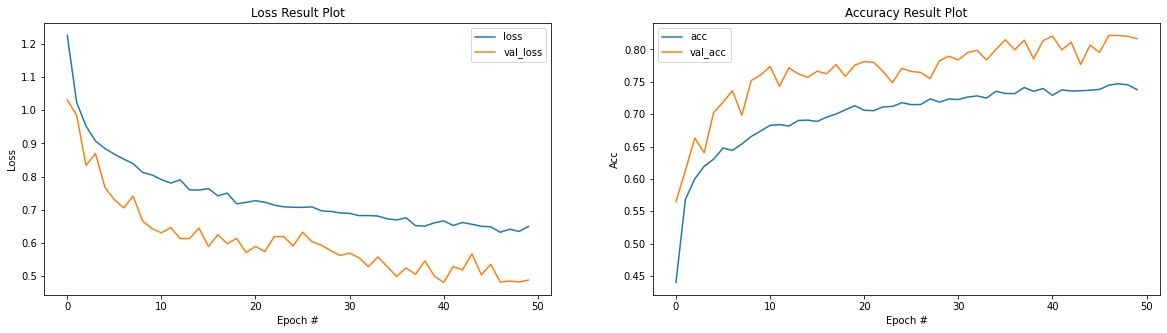

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 50), H1.history["loss"], label="loss")
ax1.plot(np.arange(0, 50), H1.history["val_loss"], label="val_loss")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()


ax2.plot(np.arange(0, 50), H1.history["acc"], label="acc")
ax2.plot(np.arange(0, 50), H1.history["val_acc"], label="val_acc")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()

In [ ]:
target_name = ['EUSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
acc = model1.evaluate(test_generator, verbose=0)
print("Accuracy: {:.2f}%".format(acc[1] * 100))

predictions = np.argmax(model1.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1], target_names=target_name)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=target_name)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
model1.save('/content/drive/MyDrive/Modul5ML/VGG19.tflite')
model1.save('/content/drive/MyDrive/Modul5ML/VGG19.h5')
model1.save('/content/drive/MyDrive/Modul5ML/VGG19.json')

In [ ]:
#Model 2
model2 = Sequential()
model2.add(InputLayer(input_shape= [150,150,3]))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=2, padding='same'))
model2.add(Dropout(0.25))
model2.add(Flatten())

#fully connected layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.05))
model2.add(Dropout(0.5))
model2.add(Dense(4, activation= 'softmax'))

#summary
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 128)      512       
 hNormalization)                                                 
                                                        

In [ ]:
# Compile model
model2.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
# Callback untuk menyimpan akurasi yang terbaik dan menaikkan nilai akurasi walaupun tidak signifikan

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
best_model_path = 'best_model2.h5'
checkpoint_callback = ModelCheckpoint(best_model_path,
                                     monitor='val_acc',
                                     save_best_only=True,
                                     verbose=1)
reduce_callback = ReduceLROnPlateau(monitor='val_loss',mode="min", patience=10, factor=0.2, min_lr=0.001, verbose=1)
callbacks_list = [checkpoint_callback, reduce_callback]

In [ ]:
H2 = model2.fit(train_generator,
              epochs = 50,
              validation_data = validation_generator,
              callbacks = [callbacks_list]
              )

Epoch 1/50
303/303 [==============================] - ETA: 0s - loss: 1.5407 - acc: 0.2515
Epoch 1: val_acc improved from -inf to 0.26648, saving model to best_model2.h5
303/303 [==============================] - 112s 362ms/step - loss: 1.5407 - acc: 0.2515 - val_loss: 1.3847 - val_acc: 0.2665 - lr: 0.0010
Epoch 2/50
303/303 [==============================] - ETA: 0s - loss: 1.3860 - acc: 0.2600
Epoch 2: val_acc did not improve from 0.26648
303/303 [==============================] - 105s 345ms/step - loss: 1.3860 - acc: 0.2600 - val_loss: 1.3866 - val_acc: 0.2502 - lr: 0.0010
Epoch 3/50
303/303 [==============================] - ETA: 0s - loss: 1.3860 - acc: 0.2594
Epoch 3: val_acc did not improve from 0.26648
303/303 [==============================] - 105s 348ms/step - loss: 1.3860 - acc: 0.2594 - val_loss: 1.3866 - val_acc: 0.2502 - lr: 0.0010
Epoch 4/50
303/303 [==============================] - ETA: 0s - loss: 1.3863 - acc: 0.2584
Epoch 4: val_acc did not improve from 0.26648
303/3

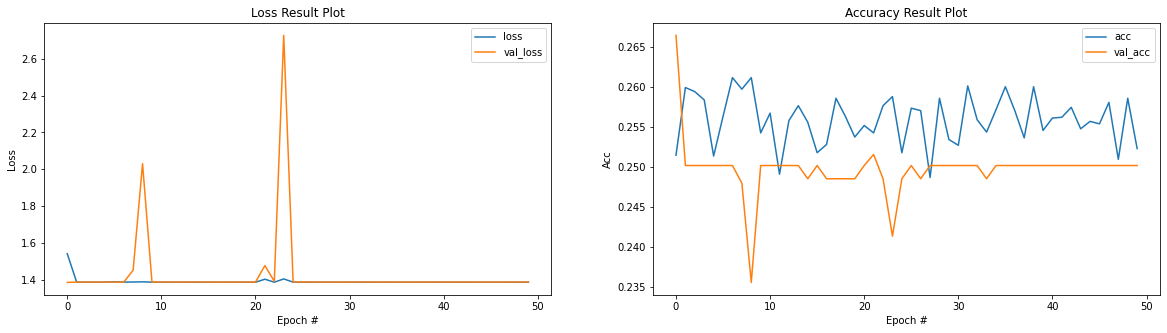

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 50), H2.history["loss"], label="loss")
ax1.plot(np.arange(0, 50), H2.history["val_loss"], label="val_loss")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()


ax2.plot(np.arange(0, 50), H2.history["acc"], label="acc")
ax2.plot(np.arange(0, 50), H2.history["val_acc"], label="val_acc")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()

Accuracy: 80.16%
79/79 [==============================] - 20s 246ms/step


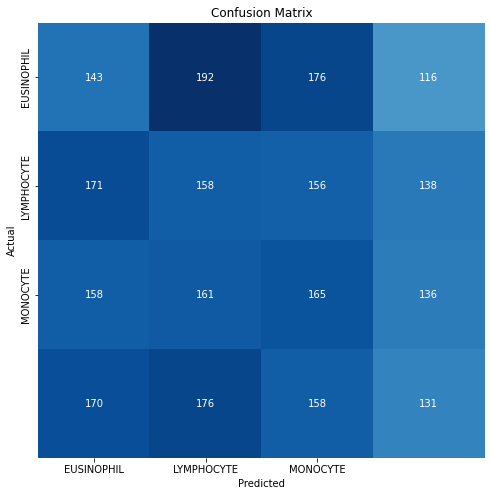

Classification Report:
----------------------
               precision    recall  f1-score   support

  EUSINOPHIL       0.22      0.23      0.23       627
  LYMPHOCYTE       0.23      0.25      0.24       623
    MONOCYTE       0.25      0.27      0.26       620
  NEUTROPHIL       0.25      0.21      0.23       635

    accuracy                           0.24      2505
   macro avg       0.24      0.24      0.24      2505
weighted avg       0.24      0.24      0.24      2505



In [ ]:
target_name = ['EUSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
acc = model1.evaluate(test_generator, verbose=0)
print("Accuracy: {:.2f}%".format(acc[1] * 100))

predictions = np.argmax(model1.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1, 2, 3])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1, 2, 3], target_names=target_name)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=target_name)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
model2.save('/content/drive/MyDrive/Modul5ML/best_model2.tflite')
model2.save('/content/drive/MyDrive/Modul5ML/best_model2.h5')
model2.save('/content/drive/MyDrive/Modul5ML/best_model2.json')